<a href="https://colab.research.google.com/github/taraudani/finalproj/blob/main/Initial_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data:**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:
aclr_orig = pd.read_csv('cleaned_aclr_data.csv')

Saving cleaned_aclr_data.csv to cleaned_aclr_data (1).csv


In [6]:
aclr = pd.read_csv('cleaned_aclr_data.csv')

In [47]:
aclr.head()

,record_id,sex_dashboard,age,age_group,tss,tss_dashboard,ikdc,acl_rsi,lsi_ext_mvic_90,lsi_ext_mvic_60,lsi_flex_mvic_60,lsi_ext_isok_60,lsi_flex_isok_60,ext_rolling,flex_rolling,ext_rolling_m,flex_rolling_m
10509,4554,Female,16.250000,3.0,-1.0,Preoperative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10879,4663,Male,17.419444,3.0,-0.9,Preoperative,NaN,NaN,NaN,NaN,NaN,65.100671,NaN,NaN,NaN,NaN,NaN
10426,4544,Male,18.136111,4.0,-0.8,Preoperative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10442,4546,Female,18.102778,4.0,-0.7,Preoperative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10460,4548,Male,16.408333,3.0,-0.6,Preoperative,NaN,NaN,NaN,NaN,NaN,96.818664,81.25,NaN,NaN,NaN,NaN


## **Graphs:**

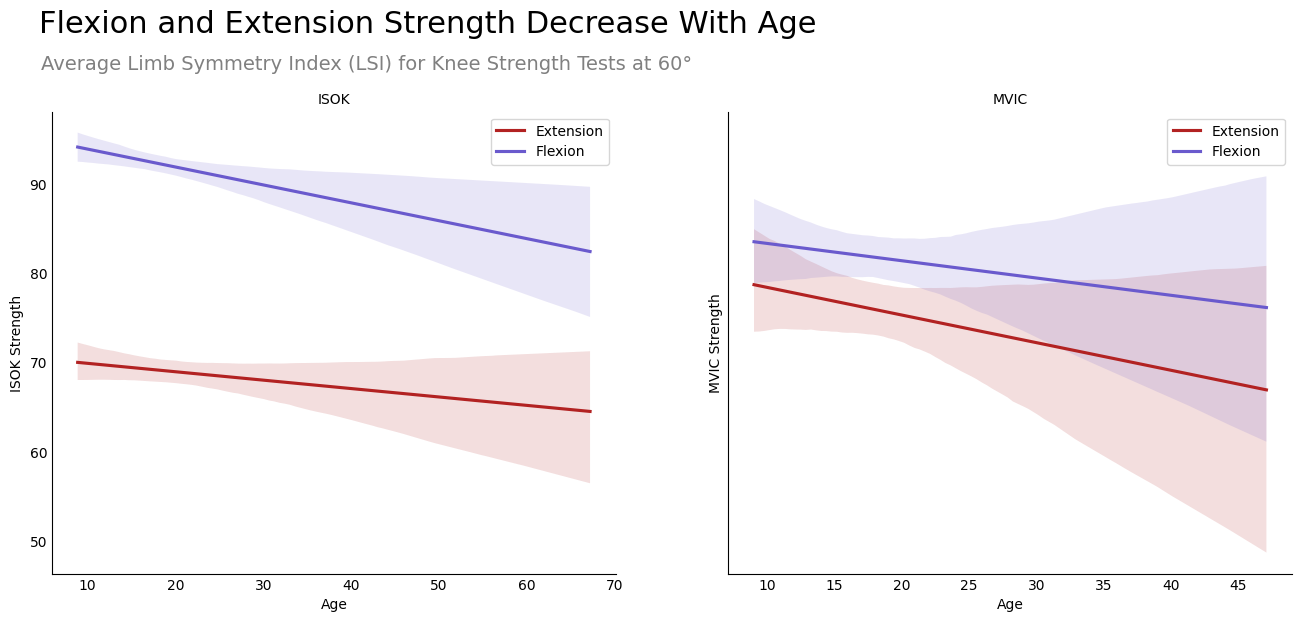

In [147]:
#create two subplots and despine
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.despine(top=True, right=True, left=False, bottom=False)

#melting data for isok variables
isok = aclr[[col for col in aclr.columns if 'isok' in col]].copy()
isok['age'] = aclr['age']
isok = isok.melt(id_vars='age', var_name="Measurement", value_name="Value")
isok.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
isok.dropna(inplace=True)

#melting data for mvic variables
mvic = aclr[[col for col in aclr.columns if 'mvic_60' in col]].copy()
mvic['age'] = aclr['age']
mvic = mvic.melt(id_vars='age', var_name="Measurement", value_name="Value")
mvic.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
mvic.dropna(inplace=True)

#averaging value by age
isok_avg = isok.groupby(['age', 'Measurement'])['Value'].mean().reset_index()
mvic_avg = mvic.groupby(['age', 'Measurement'])['Value'].mean().reset_index()

#seperating into extension and flexion measurements
isok_measurements = isok_avg['Measurement'].unique()
mvic_measurements = mvic_avg['Measurement'].unique()

#plotting isok regression plot
for m in isok_measurements:
    subset = isok_avg[isok_avg['Measurement'] == m]
    label = 'Extension' if 'ext' in m else 'Flexion'
    color = 'firebrick' if 'ext' in m else 'slateblue'
    sns.regplot(ax=axes[0], data=subset, x='age', y='Value', label= label, color = color, scatter=False)
axes[0].tick_params(axis='both', which='both', length=0)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('ISOK Strength')
axes[0].set_title('ISOK', fontsize = 10)
axes[0].legend()

#ploitting mvic regression plot
for m in mvic_measurements:
    subset = mvic_avg[mvic_avg['Measurement'] == m]
    label = 'Extension' if 'ext' in m else 'Flexion'
    color = 'firebrick' if 'ext' in m else 'slateblue'
    sns.regplot(ax=axes[1], data=subset, x='age', y='Value', label= label, color = color, scatter=False)
axes[1].tick_params(axis='both', which='both', length=0)
axes[1].set_xlabel('Age')
axes[1].set_title('MVIC', fontsize = 10)
axes[1].set_ylabel('MVIC Strength')
axes[1].legend()

#adding titles
fig.suptitle('Flexion and Extension Strength Decrease With Age', fontsize=22, y=1.05, x =0.36)
fig.text(0.525, 0.975, 'Average Limb Symmetry Index (LSI) for Knee Strength Tests at 60°', ha='right', va='top', fontsize=14, color='gray')

plt.show()

In [9]:
acl_grouped = aclr.groupby('tss_dashboard').agg(
    mean_ext_mvic=('lsi_ext_mvic_90', 'mean'),
    mean_ext_mvic_60=('lsi_ext_mvic_60', 'mean'),
    mean_flex_mvic=('lsi_flex_mvic_60', 'mean'),
    mean_ext_isok=('lsi_ext_isok_60', 'mean'),
    mean_flex_isok=('lsi_flex_isok_60', 'mean'),
    mean_ikdc=('ikdc', 'mean'),
    mean_acl_rsi=('acl_rsi', 'mean'),
).reset_index()

In [10]:
new_order = [1,2,3,0,4,5]
acl_grouped = acl_grouped.iloc[new_order]
acl_grouped = acl_grouped.reset_index(drop=True)
acl_grouped = acl_grouped.drop(index=[1,2,4,5])

acl_grouped = acl_grouped.reset_index(drop=True)
acl_grouped

,tss_dashboard,mean_ext_mvic,mean_ext_mvic_60,mean_flex_mvic,mean_ext_isok,mean_flex_isok,mean_ikdc,mean_acl_rsi
0,3 to 4 months,75.192971,69.291246,76.021983,63.093288,81.837862,69.329736,54.784712
1,13 to 24 months,95.530889,76.286429,78.357143,79.723066,96.363400,82.771023,65.636093


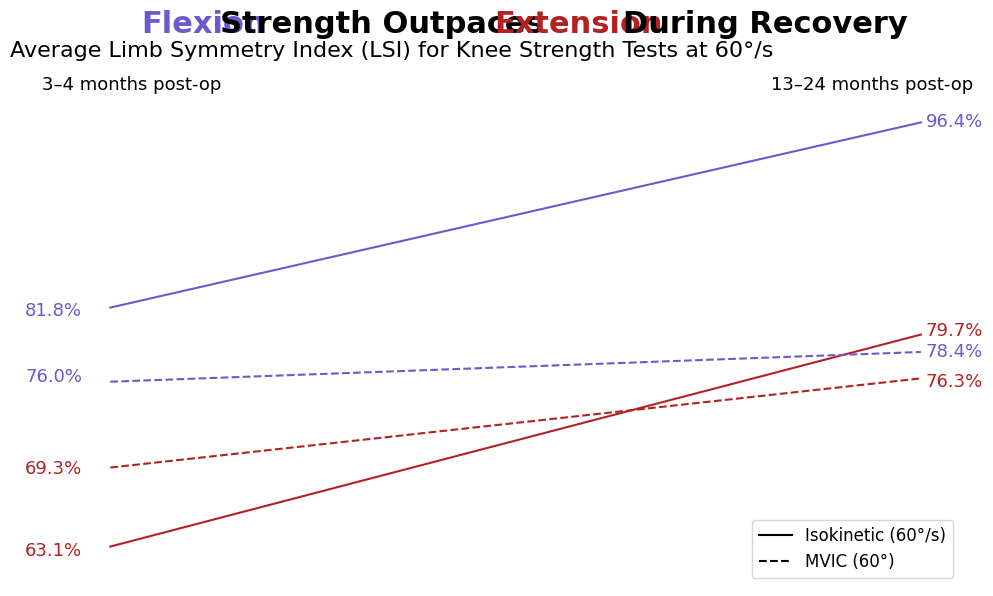

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

#graph slopes
ax.plot(acl_grouped['tss_dashboard'], acl_grouped['mean_ext_isok'], linestyle='-', color='firebrick', label='Extension Isokinetic')
ax.plot(acl_grouped['tss_dashboard'], acl_grouped['mean_flex_isok'], linestyle='-', color='slateblue', label='Flexion Isokinetic')
ax.plot(acl_grouped['tss_dashboard'], acl_grouped['mean_flex_mvic'], linestyle='--', color='slateblue', label='Flexion MVIC')
ax.plot(acl_grouped['tss_dashboard'], acl_grouped['mean_ext_mvic_60'], linestyle='--', color='firebrick', label='Extension MVIC')

#remove unnecessary scaffolding
ax.set_ylim(60, 100)
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xticks([])
ax.set_xlabel('')
sns.despine(top=True, right=True, left=True, bottom=True)

#add a legend for line type
custom_legend = [
    Line2D([0], [0], color='black', linestyle='-', label='Isokinetic (60°/s)'),
    Line2D([0], [0], color='black', linestyle='--', label='MVIC (60°)')
]
ax.legend(handles=custom_legend, loc='lower right', fontsize=12)

#add color coded title (with degrees)
plt.text(0.15, 1.13, 'Flexion', ha='center', va='top', fontsize=22, color='slateblue', font='Times New Roman', fontweight='bold', transform=ax.transAxes)
plt.text(0.35, 1.13, 'Strength Outpaces', ha='center', va='top', fontsize=22, font='Times New Roman', fontweight='bold', transform=ax.transAxes)
plt.text(0.57, 1.13, 'Extension', ha='center', va='top', fontsize=22, color='firebrick', font='Times New Roman', fontweight='bold', transform=ax.transAxes)
plt.text(0.78, 1.13, 'During Recovery', ha='center', va='top', fontsize=22, font='Times New Roman', fontweight='bold', transform=ax.transAxes)

#add a subtitle
plt.text(-0.067, 1.07, 'Average Limb Symmetry Index (LSI) for Knee Strength Tests at 60°/s',
         ha='left', va='top', fontsize=16, font='Times New Roman', transform=ax.transAxes)

#label the lines
plt.text(-0.05, 0.53, '81.8%', color='slateblue', fontsize=13, transform=ax.transAxes)
plt.text(0.96, 0.9, '96.4%', color='slateblue', fontsize=13, transform=ax.transAxes)

plt.text(-0.05, 0.4, '76.0%', color='slateblue', fontsize=13, transform=ax.transAxes)
plt.text(0.96, 0.45, '78.4%', color='slateblue', fontsize=13, transform=ax.transAxes)

plt.text(-0.05, 0.06, '63.1%', color='firebrick', fontsize=13, transform=ax.transAxes)
plt.text(0.96, 0.49, '79.7%', color='firebrick', fontsize=13, transform=ax.transAxes)

plt.text(-0.05, 0.22, '69.3%', color='firebrick', fontsize=13, transform=ax.transAxes)
plt.text(0.96, 0.39, '76.3%', color='firebrick', fontsize=13, transform=ax.transAxes)

#label axes
plt.text(0.07, 1, "3–4 months post-op", ha='center', va='top', fontsize=13, transform=ax.transAxes)
plt.text(0.9, 1, "13–24 months post-op", ha='center', va='top', fontsize=13, transform=ax.transAxes)
plt.tight_layout()


#### see the relationship between flexion strength and psychological readiness & isokinetic strength and psychological readiness

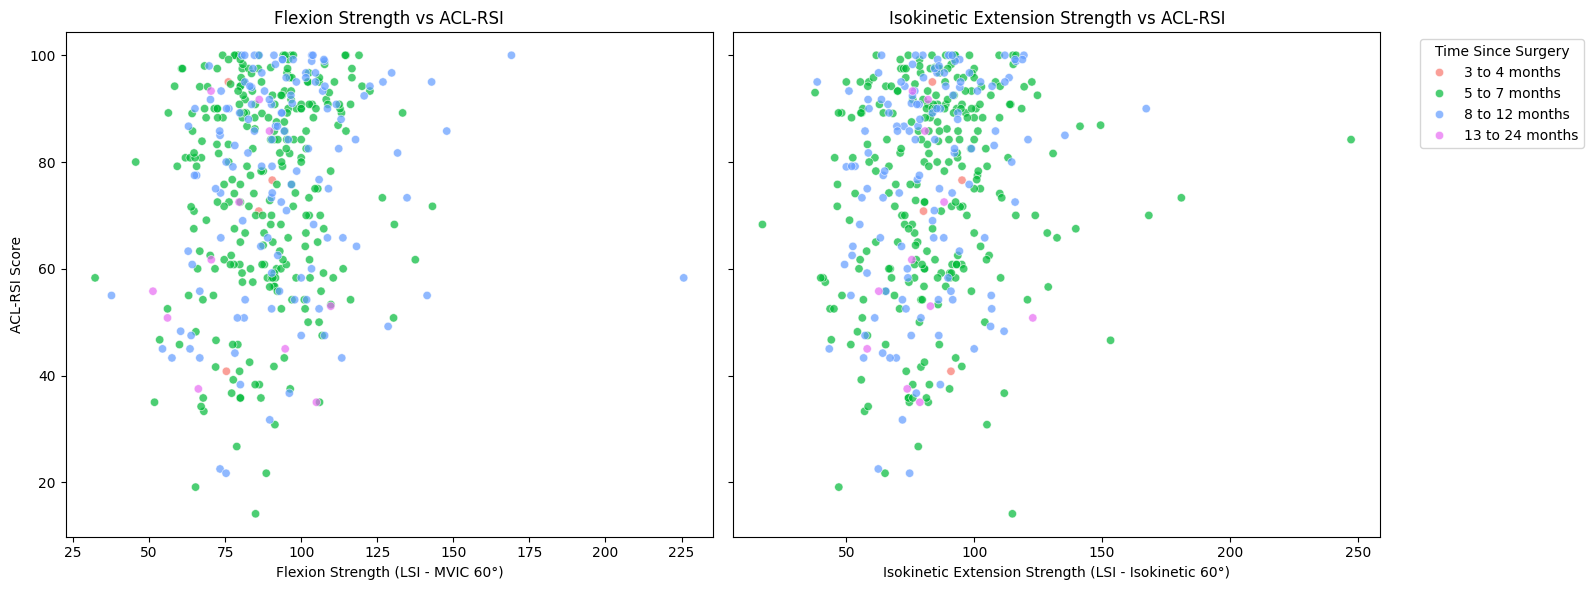

In [23]:

# Filter and clean the data
df_clean = aclr[['tss_dashboard', 'lsi_flex_mvic_60', 'lsi_ext_isok_60', 'acl_rsi']].dropna()
df_clean = df_clean[df_clean['tss_dashboard'] != 'Not Reported']

# Define a consistent order and color palette
hue_order = ['3 to 4 months', '5 to 7 months', '8 to 12 months', '13 to 24 months']
palette = {
    '3 to 4 months': '#F8766D',
    '5 to 7 months': '#00BA38',
    '8 to 12 months': '#619CFF',
    '13 to 24 months': '#E76BF3'
}

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Flexion Strength Plot
sns.scatterplot(
    data=df_clean,
    x='lsi_flex_mvic_60',
    y='acl_rsi',
    hue='tss_dashboard',
    palette=palette,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5,
    ax=axes[0]
)
axes[0].set_title("Flexion Strength vs ACL-RSI")
axes[0].set_xlabel("Flexion Strength (LSI - MVIC 60°)")
axes[0].set_ylabel("ACL-RSI Score")

# Extension Strength Plot
sns.scatterplot(
    data=df_clean,
    x='lsi_ext_isok_60',
    y='acl_rsi',
    hue='tss_dashboard',
    palette=palette,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5,
    ax=axes[1]
)
axes[1].set_title("Isokinetic Extension Strength vs ACL-RSI")
axes[1].set_xlabel("Isokinetic Extension Strength (LSI - Isokinetic 60°)")
axes[1].set_ylabel("")

# Adjust layout and legend
axes[1].legend(title="Time Since Surgery", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].legend_.remove()  # remove the left legend to avoid duplication
plt.tight_layout()
plt.show()
